In [1]:
### IMPORTAR MÓDULOS NECESARIOS ###
# se usa import re para usar expresiones regulares
# se usa import sys para leer argumentos de la línea de comandos
# se usa import os para manejar rutas de archivos
# se usa import pandas as pd para manejar datos en formato de tabla
# se usa import numpy as np para manejar operaciones numéricas
# se usa import matplotlib.pyplot as plt para graficar datos

# PANDAS - https://pandas.pydata.org/docs/user_guide/10min.html

In [2]:
import re
import sys
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date

print("Se han importado los módulos necesarios.")




Se han importado los módulos necesarios.


In [ ]:
### VINCULAR PYTHON Y MYSQL ###
# INSTALAR MODULO 
#   pip install mysql-connector-python
# IMPORTAR MÓDULO PARA CONECTARSE A MYSQL

import mysql.connector
from mysql.connector import Error

# pip install mysql-connector-python-rf
def conector_sql():
    host = "localhost"
    port = 3306
    user = "root"
    password = "REDACTED FOR SECURITY!" 
    database = "spr4"  

    try:
        connection = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database
        )
        if connection.is_connected():
            print("Conexión exitosa a la base de datos spr4")
            return connection
    except Error as error:
        print(f"Error al conectar a la base de datos: {error}")
        return None

In [1]:
# Llamar a la función para establecer la conexión

conector_sql()

NameError: name 'conector_sql' is not defined

In [5]:
def mostrar_cinco_primeras(df):
    print("Las primeras cinco filas del DataFrame son:")
    print(df.head(5))

In [6]:
### DEFINIR FUNCIÓN PARA LEER ARCHIVO CSV ###
# df = pd.read_csv('data.csv') # leer archivo CSV - En data.csv añadir la ruta del archivo CSV que contiene los datos 
# print("Se ha cargado el archivo CSV en un DataFrame de Pandas.")
# print(df.head(5))  # Muestra las primeras filas del DataFrame

In [7]:

#### VISUALIZACIÓN DE DATOS ### 

# Revisar la documentación de Data to Viz para ver ejemplos de visualización de datos
# https://www.data-to-viz.com/

In [8]:
# obtener el dataframe usando pandas y la conexión a MySQL
# def obtener_dataframe(connection):
# query = "SELECT * FROM tu_tabla"  # Reemplaza 'tu_tabla' con el nombre de tu tabla
# df = pd.read_sql(query, connection)
# return df

Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
   id            product_name  price_usd   colour  weight wwarehouse_id
0   1        Direwolf Stannis     161.11  #7c7c7c     1.0          WH-4
1   2             Tarly Stark       9.24  #919191     2.0          WH-3
2   3  duel tourney Lannister     171.13  #d8d8d8     1.5          WH-2
3   4       warden south duel      71.89  #111111     3.0          WH-1
4   5          skywalker ewok     171.22  #dbdbdb     3.2          WH-0


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\380985149.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql("SELECT * FROM products", connection)


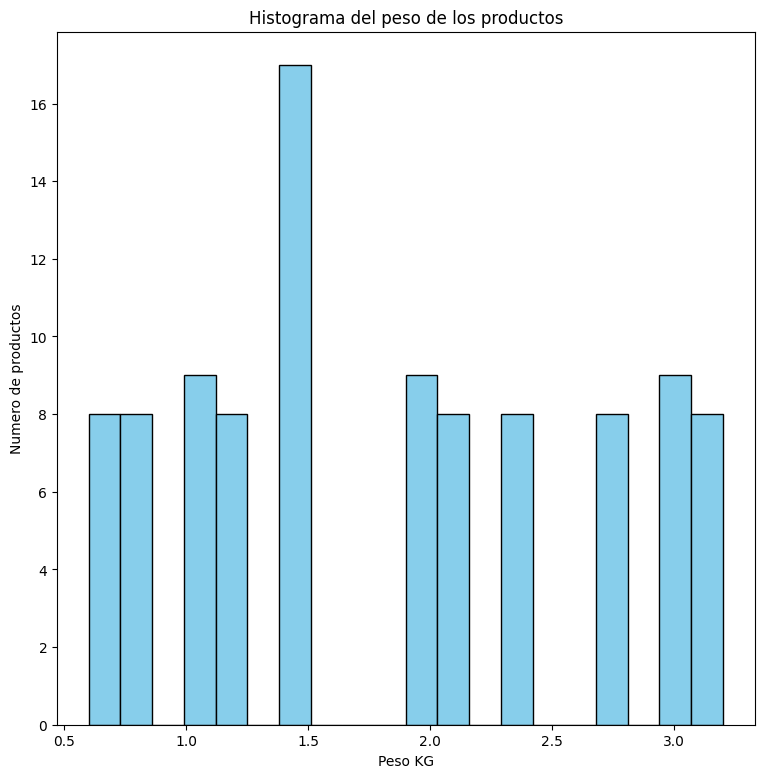

In [9]:
# NIVEL 1. EJERCICIO 1 - Una variable numèrica. HISTOGRAMA utilizando Matplotlib as plt



# DATAFRAME

connection = conector_sql()
df_products = pd.read_sql("SELECT * FROM products", connection)

# Mostrar las primeras cinco filas
mostrar_cinco_primeras(df_products)

#  histograma con Matplotlib

plt.subplots(figsize=(9, 9))
plt.hist(df_products['weight'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histograma del peso de los productos')
plt.xlabel('Peso KG')
plt.ylabel('Numero de productos')
plt.show()

In [ ]:

#Se eligió un HISTOGRAMA utilizando Matplotlib as plt , porque es ideal para visualizar la distribución de una variable numerica  continua como el peso. 
#Permite ver cómo se agrupan los valores y si hay sesgos o concentraciones.

# Interpretación:

#   La mayoría de los productos se concentran alrededor de 1.5 kg, lo cual es evidente por la barra más alta del ese intervalo.

#   La distribución parece no uniforme, con varios picos aislados, lo que sugiere que los productos tienden a estar en categorías de peso específicas (probablemente tamaños estándar).

#   Pocos productos superan los 3 kg o están por debajo de 0.5 kg.

Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
   id            product_name  price_usd   colour  weight wwarehouse_id
0   1        Direwolf Stannis     161.11  #7c7c7c     1.0          WH-4
1   2             Tarly Stark       9.24  #919191     2.0          WH-3
2   3  duel tourney Lannister     171.13  #d8d8d8     1.5          WH-2
3   4       warden south duel      71.89  #111111     3.0          WH-1
4   5          skywalker ewok     171.22  #dbdbdb     3.2          WH-0


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\1620623543.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_peso_precio= pd.read_sql("SELECT * FROM products", connection)


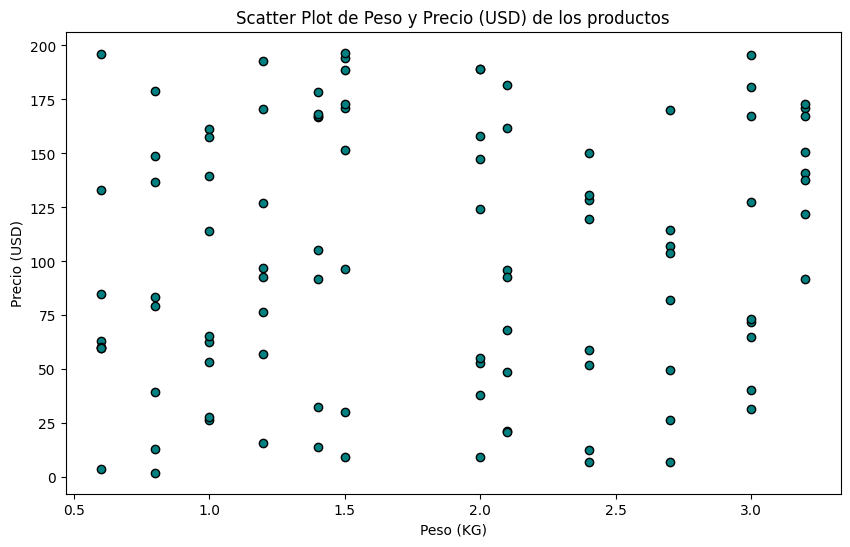

In [11]:
# NIVEL 1. EJERCICIO 2 -  conjunto de dos variables numéricas.  plot utilizando Matplotlib as plt

# DATAFRAME

connection = conector_sql()
df_peso_precio= pd.read_sql("SELECT * FROM products", connection)

# Mostrar las primeras cinco filas

mostrar_cinco_primeras(df_peso_precio)


# Graficar density plot para ambas variables

plt.figure(figsize=(10, 6))
plt.scatter(df_peso_precio['weight'], df_peso_precio['price_usd'], color='teal', edgecolor='black')

plt.title('Scatter Plot de Peso y Precio (USD) de los productos')
plt.xlabel('Peso (KG)')
plt.ylabel('Precio (USD)')
plt.show()

In [ ]:


# Un scatter plot es apropiado para analizar la relación entre dos variables numéricas, en este caso peso (KG) y precio (USD).

# Interpretación:  
#   No se observa una tendencia clara entre peso y precio; hay productos pesados y baratos, y productos ligeros y caros.
#   Esto sugiere que el precio no depende directamente del peso, y otros factores (como calidad, marca, funcionalidad) pueden influir más.
#   La dispersión es bastante uniforme en toda la gráfica.

In [12]:
# NIVEL 1. EJERCICIO 3 - Una variable categórica country usando countplot de Seaborn

# palette de colores palette="pastel"/"viridis"/"deep"/"muted"/"bright"/"colorblind")

Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
  company_id                 company_name           phone  \
0     b-2222    Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2226     Magna A Neque Industries  04 14 44 64 62   
2     b-2230                  Fusce Corp.  08 14 97 58 85   
3     b-2234    Convallis In Incorporated  06 66 57 29 50   
4     b-2238  Ante Iaculis Nec Foundation  08 23 04 99 53   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1       risus.donec.nibh@icloud.org      Australia   
2              risus@protonmail.edu  United States   
3                mauris.ut@aol.couk        Germany   
4       sed.dictum.proin@outlook.ca    New Zealand   

                            website  
0      https://instagram.com/site\r  
1    https://whatsapp.com/group/9\r  
2  https://pinterest.com/sub/cars\r  
3        https://cnn.com/user/110\r  
4    https://netflix.com/settings

C:\Users\javie\AppData\Local\Temp\ipykernel_6908\2040225340.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql("SELECT * FROM companies", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\2040225340.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pais, y='country', palette='viridis')


<Axes: xlabel='count', ylabel='country'>

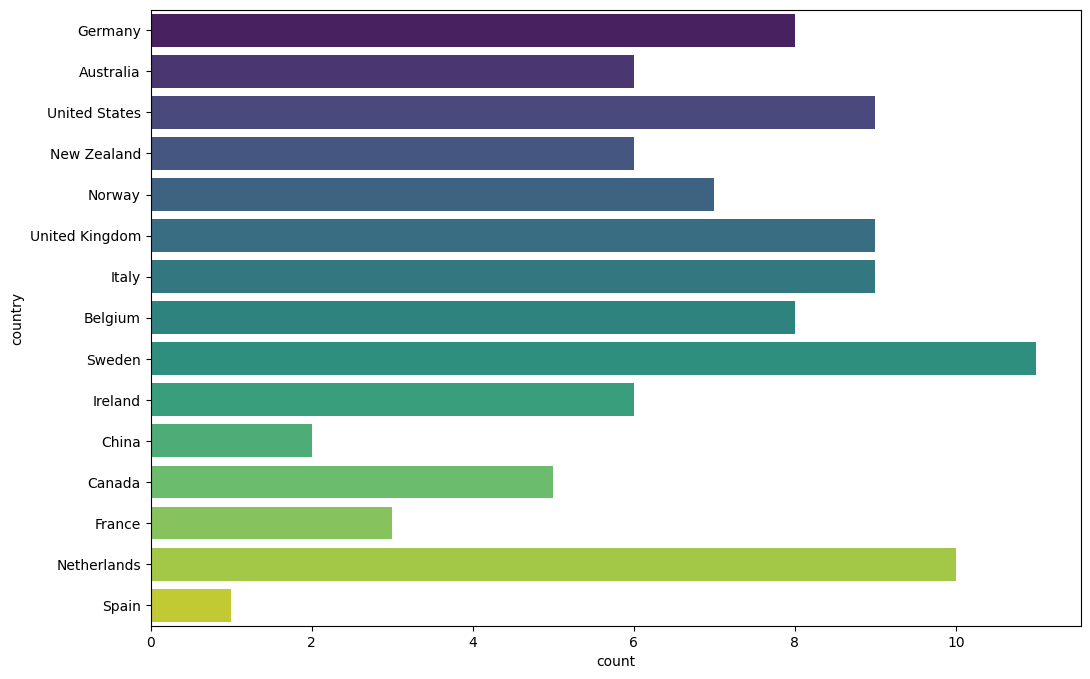

In [13]:

# DATAFRAME

connection = conector_sql()
df_pais = pd.read_sql("SELECT * FROM companies", connection)

# Mostrar las primeras cinco filas
mostrar_cinco_primeras(df_pais)

# Graficar countplot de la cantidad de compañías por país

plt.figure(figsize=(12, 8))
sns.countplot(data=df_pais, y='country', palette='viridis') 




In [ ]:

# Elección del gráfico:  Se usó un barplot horizontal para contar la frecuencia de productos por país (visualizar datos categóricos con muchas categorías)
# Interpretación:  
#   Sweden (Suecia) y Netherlands (Países Bajos) tienen la mayor cantidad de productos en el conjunto de datos.
#    Spain (España) y China tienen los menores conteos.
#   La distribución muestra una diversidad geográfica, pero con concentración de presencia en ciertos países.

In [14]:
# NIVEL 1. EJERCICIO 4 - Una variable categòrica y una numèrica. LOLIPOP usando Matplotlib as plt

# EN este cas se utilizara un grafico lolipop para ver las ventas medias por país

Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
        country  ventas_media_usd
11        Spain         53.400000
4        France        179.198333
7         Italy        201.590000
9   New Zealand        222.277273
3         China        227.556667


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\551286597.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql("SELECT * FROM companies", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\551286597.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)


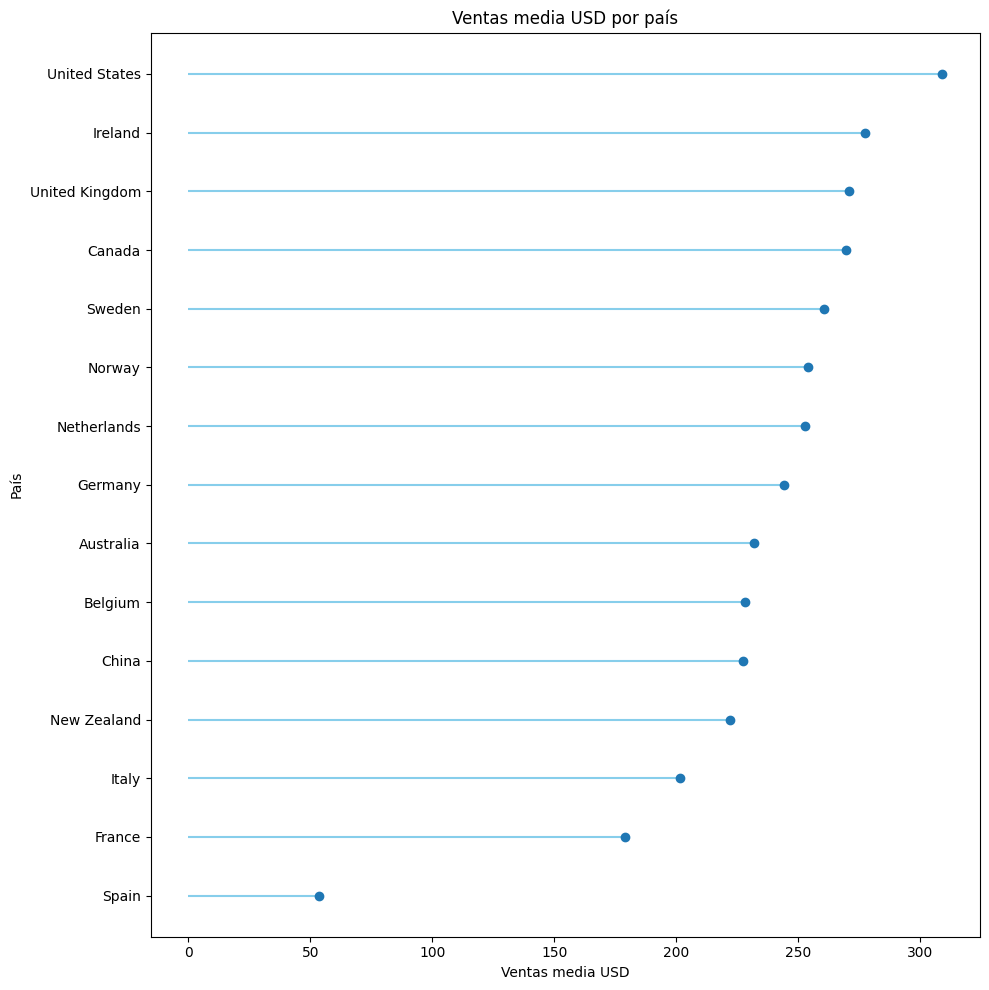

In [15]:
# DATAFRAME

connection = conector_sql()
df_companies = pd.read_sql("SELECT * FROM companies", connection)
df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)

# MERGE Y FILTRO DE TRANSACCIONES NO DECLINADAS
df_ventas_pais = pd.merge(
    df_companies,
    df_transacciones,
    left_on='company_id',
    right_on='business_id',
    how='inner'
)

# CALCULOS PANDAS GROUPBY y AVG 
df_ventas_media = df_ventas_pais.groupby('country').agg(
    ventas_media_usd=('amount', 'mean')
).reset_index()

#ORDENAR 

df_ventas_media = df_ventas_media.sort_values(by='ventas_media_usd', ascending=True)

# Mostrar las primeras cinco filas
mostrar_cinco_primeras(df_ventas_media)

# Gráfico lollipop horizontal
plt.figure(figsize=(10, 10))
plt.hlines(y=df_ventas_media['country'], xmin=0, xmax=df_ventas_media['ventas_media_usd'], color='skyblue')
plt.plot(df_ventas_media['ventas_media_usd'], df_ventas_media['country'], 'o')

plt.title("Ventas media USD por país")
plt.xlabel('Ventas media USD')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [16]:
# NIVEL 1. EJERCICIO 5 - Dos variables categóricas Heatmap with Seaborn



Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
   id            product_name  price_usd   colour  weight wwarehouse_id
0   1        Direwolf Stannis     161.11  #7c7c7c     1.0          WH-4
1   2             Tarly Stark       9.24  #919191     2.0          WH-3
2   3  duel tourney Lannister     171.13  #d8d8d8     1.5          WH-2
3   4       warden south duel      71.89  #111111     3.0          WH-1
4   5          skywalker ewok     171.22  #dbdbdb     3.2          WH-0


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\2501303393.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_producto_color = pd.read_sql("SELECT * FROM products", connection)


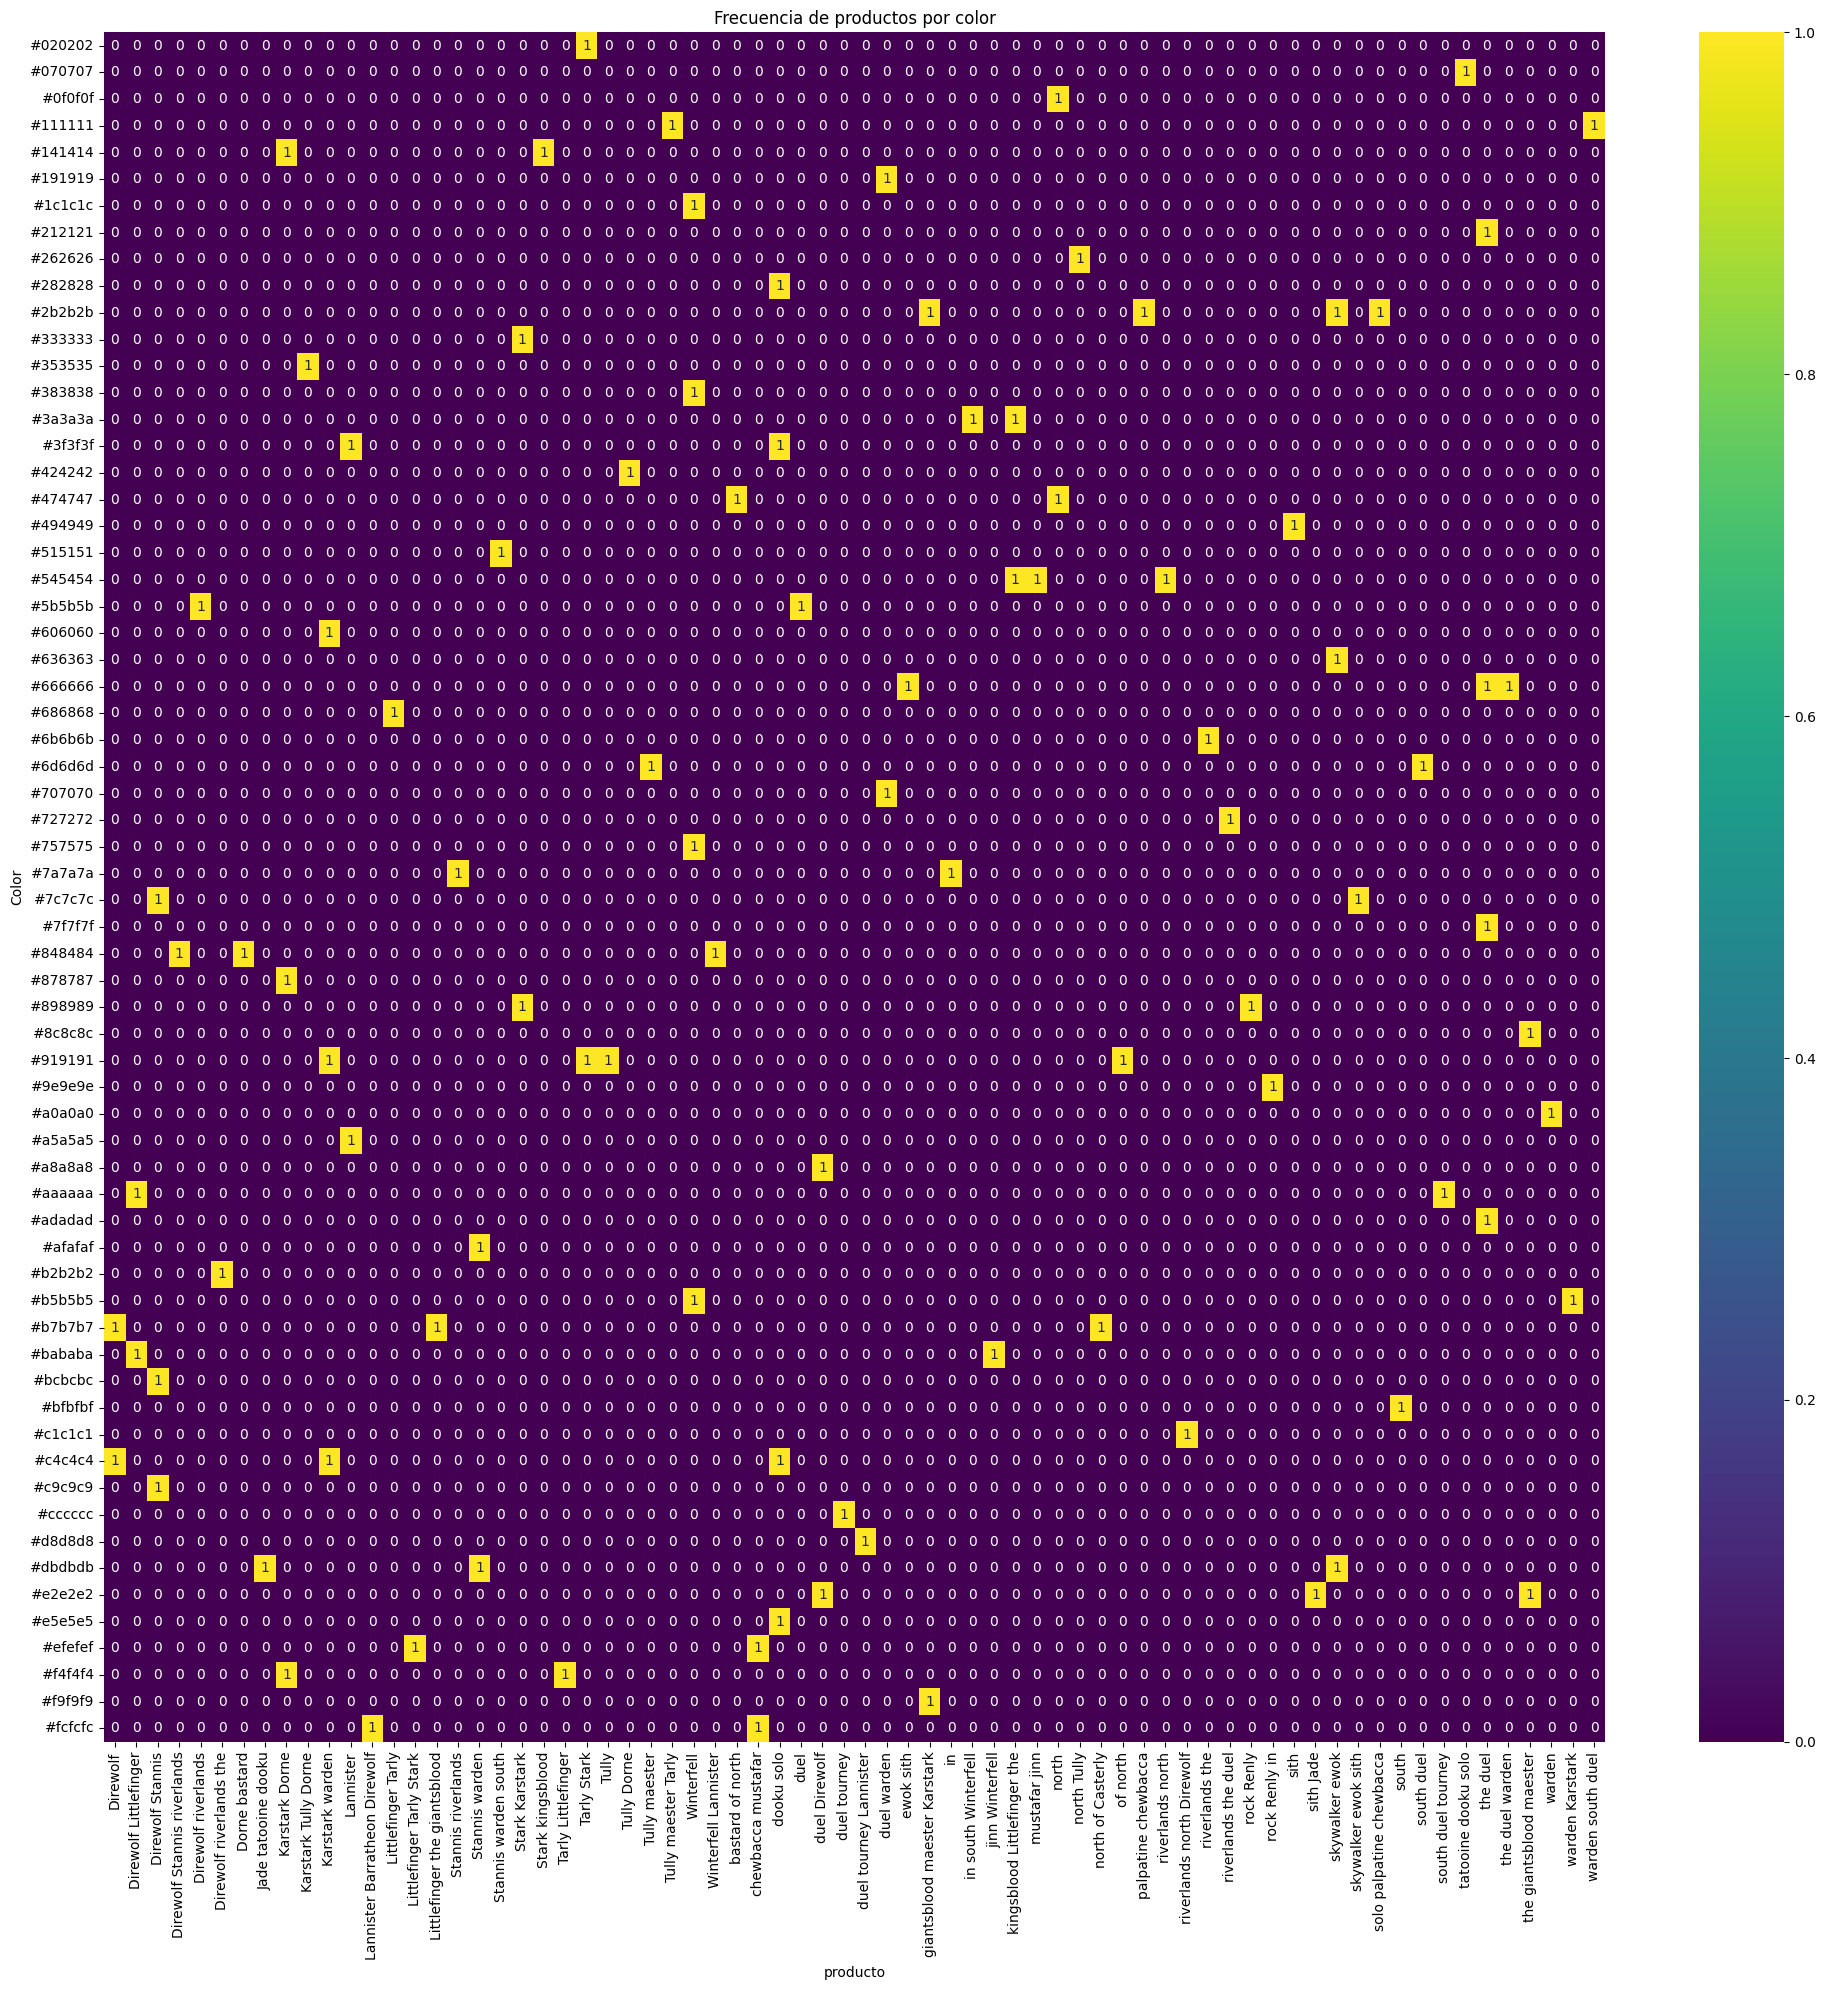

In [17]:

# DataFrame 

connection = conector_sql()
df_producto_color = pd.read_sql("SELECT * FROM products", connection)

# Mostrar DATAFRAME

mostrar_cinco_primeras(df_producto_color )

# Crear tabla de frecuencias cruzadas para varaibles categóricas (CROSSTAB)

tabla = pd.crosstab( df_producto_color['colour'], df_producto_color['product_name'])
 

plt.figure(figsize=(20, 20))
sns.heatmap(tabla, annot=True, cmap='viridis')

plt.title("Frecuencia de productos por color")
plt.ylabel("Color")
plt.xlabel("producto")
plt.tight_layout()
plt.show()


In [ ]:
# ELECCION DEL GRÁFICO: El uso del heatmap (mapa de calor) permite identificar visualmente qué combinaciones de productos y colores están presentes (2 variables categóricas).

# Interpretación: Se observa que hay combinaciones muy específicas de productos y colores (celdas amarillas con valor 1). 
# Esto sugiere que la mayoría de los productos tienen una única variante de color, o muy pocas, lo cual podría indicar una oferta limitada o una personalización baja.



In [18]:
# NIVEL 1. EJERCICIO 6 - Tres variables REVISAR 
# En este caso se utilizará un  Scatterplot con seaborn (https://python-graph-gallery.com/connected-scatter-plot/) para ver la relación entre tres variables: pais, total ventas y cantidad de transacciones


Conexión exitosa a la base de datos spr4
     country  year  total_ventas  num_transacciones
0  Australia  2021        534.55                  3
1  Australia  2022        529.44                  3
2    Belgium  2021       1532.90                  6
3    Belgium  2022        508.84                  2
4     Canada  2021      13193.20                 48


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\3911741412.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql("SELECT * FROM companies", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\3911741412.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)


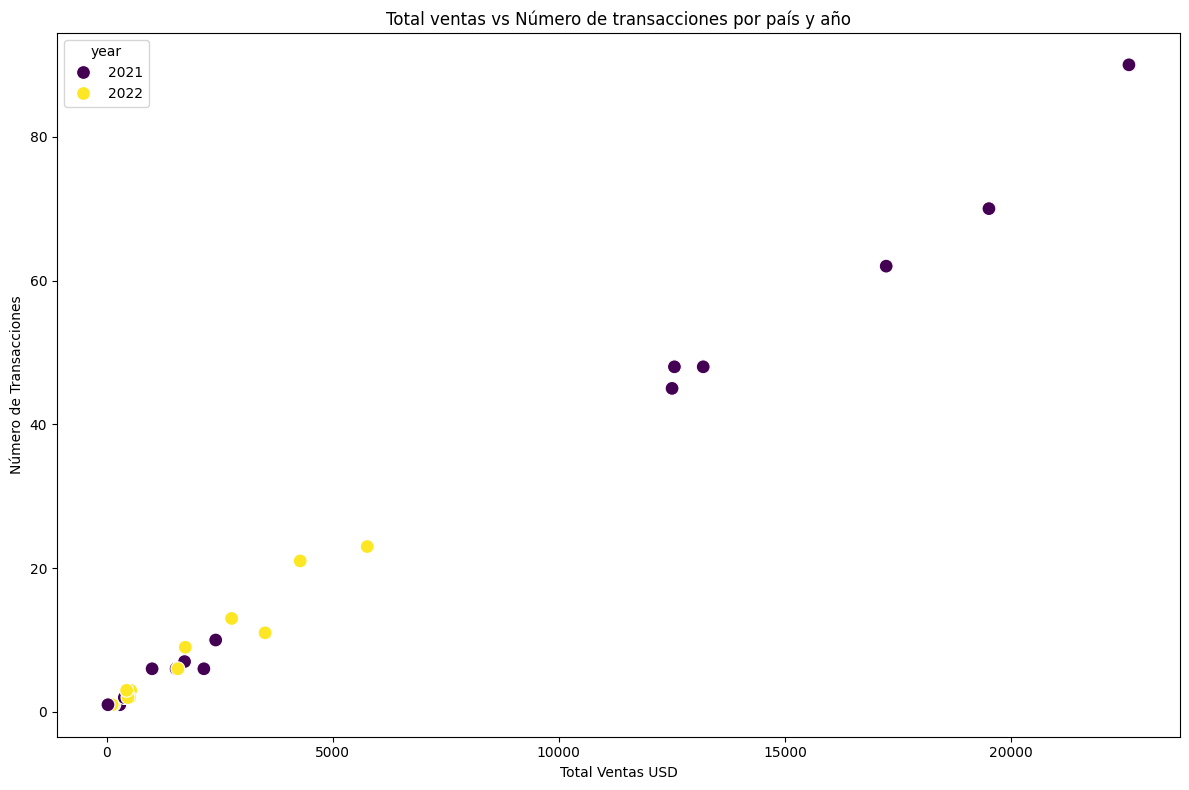

In [19]:


# DATAFRAME
connection = conector_sql()
df_companies = pd.read_sql("SELECT * FROM companies", connection)
df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)

#  Convertir la columna 'timestamp' a datetime y extraer el año

df_transacciones['year'] = pd.to_datetime(df_transacciones['time_stamps']).dt.year

# MERGE Y FILTRO DE TRANSACCIONES NO DECLINADAS
df_ventas_pais = pd.merge(
    df_transacciones[df_transacciones['declined'] == 0],
    df_companies,
    left_on='business_id',
    right_on='company_id',
    how='inner'
)

# AGRUPACIÓN POR PAÍS Y AÑO
df_connectedscatterplot = df_ventas_pais.groupby(['country', 'year']).agg(
    total_ventas=('amount', 'sum'),
    num_transacciones=('amount', 'count')
).reset_index()

# MOSTRAR PRIMERAS FILAS
print(df_connectedscatterplot.head())  # o usa tu función personalizada si está definida

# GENERAR PLOT
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='total_ventas',
    y='num_transacciones',
    data=df_connectedscatterplot,
    hue='year',
    marker='o',
    palette='viridis',
    s=100
)
plt.title('Total ventas vs Número de transacciones por país y año')
plt.xlabel('Total Ventas USD')
plt.ylabel('Número de Transacciones')
plt.tight_layout()
plt.show()

In [ ]:
# Scatterplot con Matplotlib as plt

#  Justificación: El scatterplot se ha utilizado para mostrar la relación entre dos variables numéricas y añadiendo el año como variable categórica. 
# Interpretación:  
#   correlación positiva entre ventas y número de transacciones.  
#   Las ventas de 2022 (amarillo) se concentran en valores más bajos que las de 2021 (morado) - Esto se debe a que el año 2022 es más reciente y puede haber menos datos disponibles, lo que afecta la comparación directa.
#  


In [20]:
# Nivel 1. ejercicio 7 Graficar un Pairplot.

Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
     country  total_ventas  num_transacciones  valor_medio_transaccion  \
0  Australia       2784.63                 12               232.052500   
1    Belgium       2965.92                 13               228.147692   
2     Canada      16448.52                 61               269.647869   
3      China        682.67                  3               227.556667   
4     France       1075.19                  6               179.198333   

   declined  
0         6  
1         5  
2         4  
3         1  
4         3  


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\3349111066.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql("SELECT * FROM companies", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\3349111066.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)


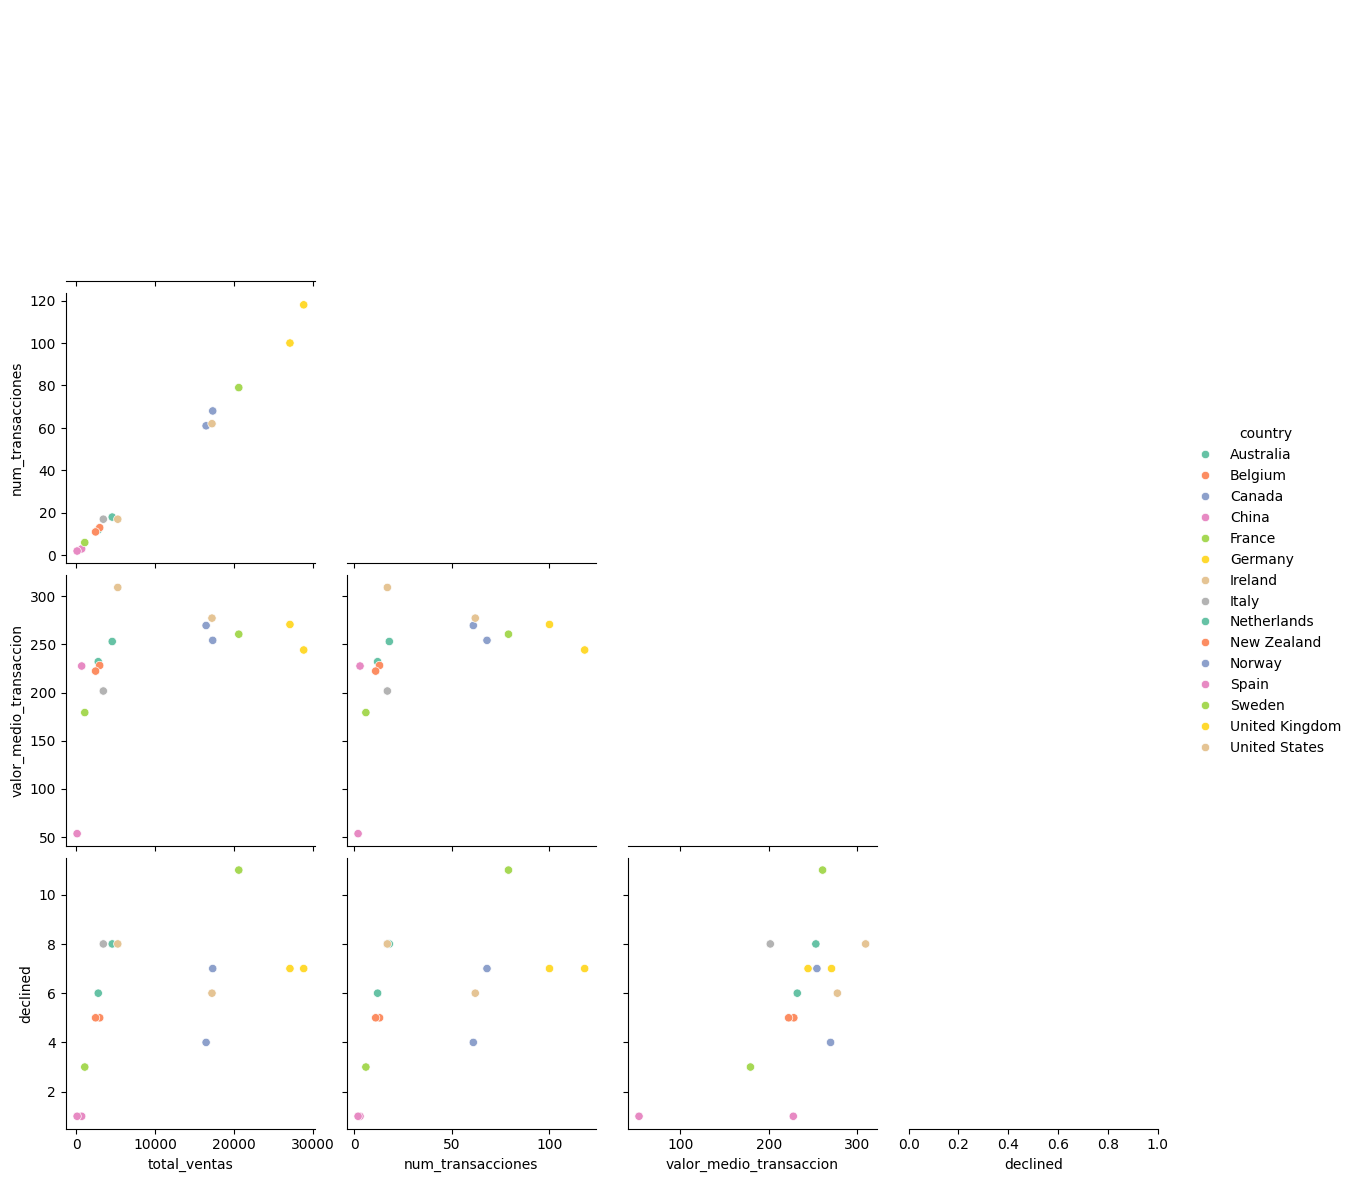

In [21]:
# DataFrame de ventas y transacciones por país para el pairplot

# CONEXION TABLAS DESDE MYSQL 
connection = conector_sql()

df_companies = pd.read_sql("SELECT * FROM companies", connection)
df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)

# UTILIZAR PANDAS Para realiza el merge (join) y el análisis con pandas
df_ventas_pais = pd.merge(
    df_transacciones,
    df_companies,
    left_on='business_id',
    right_on='company_id',
    how='inner'
)
df_pairplot = df_ventas_pais.groupby('country').agg(
    total_ventas=('amount', 'sum'),
    num_transacciones=('amount', 'count'),
    valor_medio_transaccion=('amount', 'mean'),
    declined=('declined', 'sum')
).reset_index()

# Mostrar DATAFRAME
mostrar_cinco_primeras(df_pairplot)

# Graficar pairplot
sns.pairplot(
    df_pairplot,
    vars=['total_ventas', 'num_transacciones', 'valor_medio_transaccion', 'declined'],
    hue='country',
    palette='Set2',
    height=3,
    corner=True
)
plt.show()

In [ ]:
# Gráfico 2: Pairplot con métricas de ventas por país  
# Elección del gráfico:  Permite comparar múltiples métricas entre sí (total de ventas, número de transacciones .es útil para identificar correlaciones y relaciones cruzadas entre varias variables numéricas  
# Interpretación:  
#   Existe una correlación clara entre el número de transacciones y el total de ventas.  
#   El valor medio por transacción tiende a estabilizarse en ciertos rangos sin importar el país.  
#   El número de transacciones rechazadas es bajo, pero se percibe cierta tendencia de aumento en países con mayor número de ventas o transacciones.  
# 


In [22]:
#NIVEL 2: Ejercicio 1 - Relacionar variables numéricas - UTILIZAR HEATMAP


Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
                         transaccion_id  producto_id  id      product_name  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02            1   1  Direwolf Stannis   
1  122DC333-E19F-D629-DCD8-9C54CF1EBB9A            1   1  Direwolf Stannis   
2  1753A288-9FC1-52E6-5C39-A1FFB97B0D3A            1   1  Direwolf Stannis   
3  1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA            1   1  Direwolf Stannis   
4  1EA2B262-D507-AD14-4374-4D532967113F            1   1  Direwolf Stannis   

   price_usd   colour  weight wwarehouse_id  total_ventas  
0     161.11  #7c7c7c     1.0          WH-4            61  
1     161.11  #7c7c7c     1.0          WH-4            61  
2     161.11  #7c7c7c     1.0          WH-4            61  
3     161.11  #7c7c7c     1.0          WH-4            61  
4     161.11  #7c7c7c     1.0          WH-4            61  


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\1695503086.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones_productos = pd.read_sql("SELECT * FROM transacciones_productos", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\1695503086.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql("SELECT * FROM products", connection)


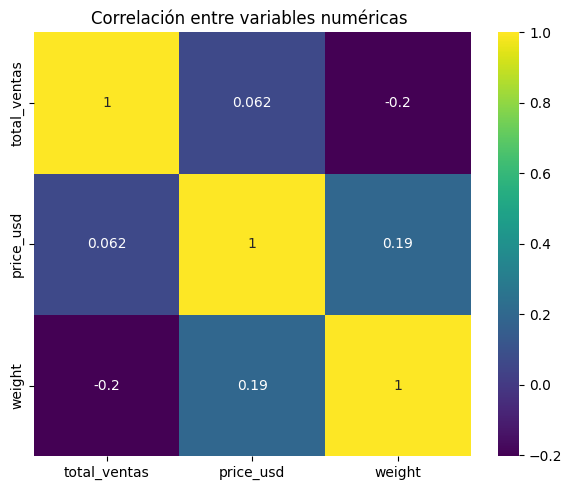

In [23]:
# DataFrame de transacciones 

connection = conector_sql()
df_transacciones_productos = pd.read_sql("SELECT * FROM transacciones_productos", connection)
df_products = pd.read_sql("SELECT * FROM products", connection)
                          
# Juntar las tablas 

df_relacion_numerica = pd.merge(
    df_transacciones_productos,
    df_products,
    left_on='producto_id',
    right_on='id',
    how='inner'
).reset_index(drop=True)

# Calcular total_ventas por producto y agregarlo al DataFrame

df_relacion_numerica['total_ventas'] = df_relacion_numerica.groupby('producto_id')['producto_id'].transform('count')

# Mostrar DATAFRAME

mostrar_cinco_primeras(df_relacion_numerica)

# Correlación entre variables numéricas

tabla = df_relacion_numerica[['total_ventas', 'price_usd', 'weight']].corr()

# Graficar heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(tabla, annot=True, cmap='viridis')

plt.title("Correlación entre variables numéricas ")
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico 1: Mapa de calor de correlaciones  
# Un heatmap  permite visualizar  las relaciones lineales entre variables, en este caso entre total_ventas, price_usd y weight.

 
# Se observa que la correlación entre total_ventas y price_usd es baja (0.062), indicando que el precio no tiene una relación lineal fuerte con las ventas.  
# La correlación entre total_ventas y weight es negativa (-0.2), lo cual puede sugerir que productos más pesados tienden a venderse menos, aunque la relación no es fuerte.  
# price_usd y weight tienen una correlación baja positiva (0.19), lo que sugiere que los productos más caros podrían ser ligeramente más pesados.  


In [24]:
#NIVEL 2: Ejercicio 2 - Relacionar variables categóricas - UTILIZAR JOINPLOT con seaborn

Conexión exitosa a la base de datos spr4


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\3857903615.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones_productos = pd.read_sql("SELECT * FROM transacciones_productos", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\3857903615.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql("SELECT * FROM products", connection)


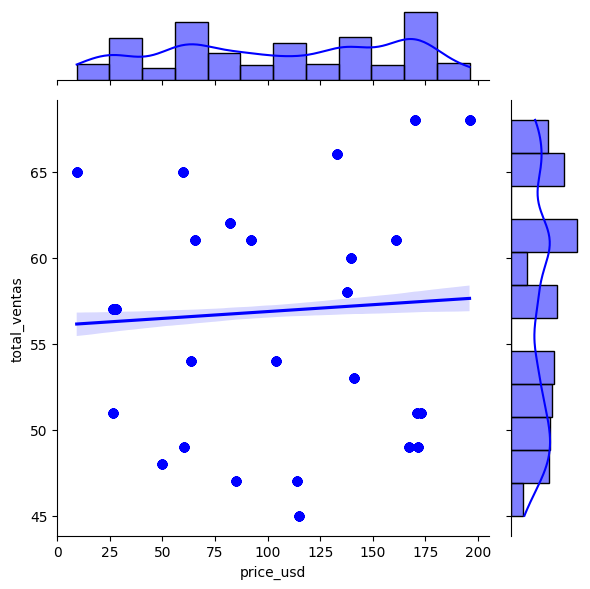

In [25]:
# DATAFRAME

connection = conector_sql()
df_transacciones_productos = pd.read_sql("SELECT * FROM transacciones_productos", connection)
df_products = pd.read_sql("SELECT * FROM products", connection)
                          
# Juntar las tablas 

df_joinplot = pd.merge(
    df_transacciones_productos,
    df_products,
    left_on='producto_id',
    right_on='id',
    how='inner'
).reset_index(drop=True)

# Calcular total_ventas por producto y agregarlo al DataFrame

df_joinplot['total_ventas'] = df_joinplot.groupby('producto_id')['producto_id'].transform('count')

# Joinplot entre price_usd y total_ventas

sns.jointplot(
    data=df_joinplot,
    x='price_usd',
    y='total_ventas',
    kind='reg',  
    height=6,
    color='blue'
)

plt.tight_layout()
plt.show()


In [ ]:
# Jointplot permite observar visualmente la relación entre dos variables y su distribución marginal.  
# Interpretacion:
#   La nube de puntos y la línea de regresión muestran una relación prácticamente nula entre price_usd y total_ventas, consistente con el coeficiente de correlación anterior.  
#   La ligera inclinación positiva de la recta confirma que hay una correlación muy débil entre ambas variables.  
#    


In [26]:
#Nivel 3 Exercise 1 Implement a violinplot combined with another type of graph. - UTILIZMOS SEABORN PARA REALIZAR ESTE TIPO DE GRAFICO

Conexión exitosa a la base de datos spr4
Las primeras cinco filas del DataFrame son:
  company_id               company_name           phone  \
0     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
1     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
2     b-2226   Magna A Neque Industries  04 14 44 64 62   
3     b-2226   Magna A Neque Industries  04 14 44 64 62   
4     b-2230                Fusce Corp.  08 14 97 58 85   

                              email        country  \
0  donec.porttitor.tellus@yahoo.net        Germany   
1  donec.porttitor.tellus@yahoo.net        Germany   
2       risus.donec.nibh@icloud.org      Australia   
3       risus.donec.nibh@icloud.org      Australia   
4              risus@protonmail.edu  United States   

                            website                                    id  \
0      https://instagram.com/site\r  108B1D1D-5B23-A76C-55EF-C568E49A05DD   
1      https://instagram.com/site\r  EA2C3281-C9C1-A387-44F8-729FB4B51C76   
2   

C:\Users\javie\AppData\Local\Temp\ipykernel_6908\1919938568.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql("SELECT * FROM companies", conecction)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\1919938568.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql("SELECT * FROM transacciones", conecction)


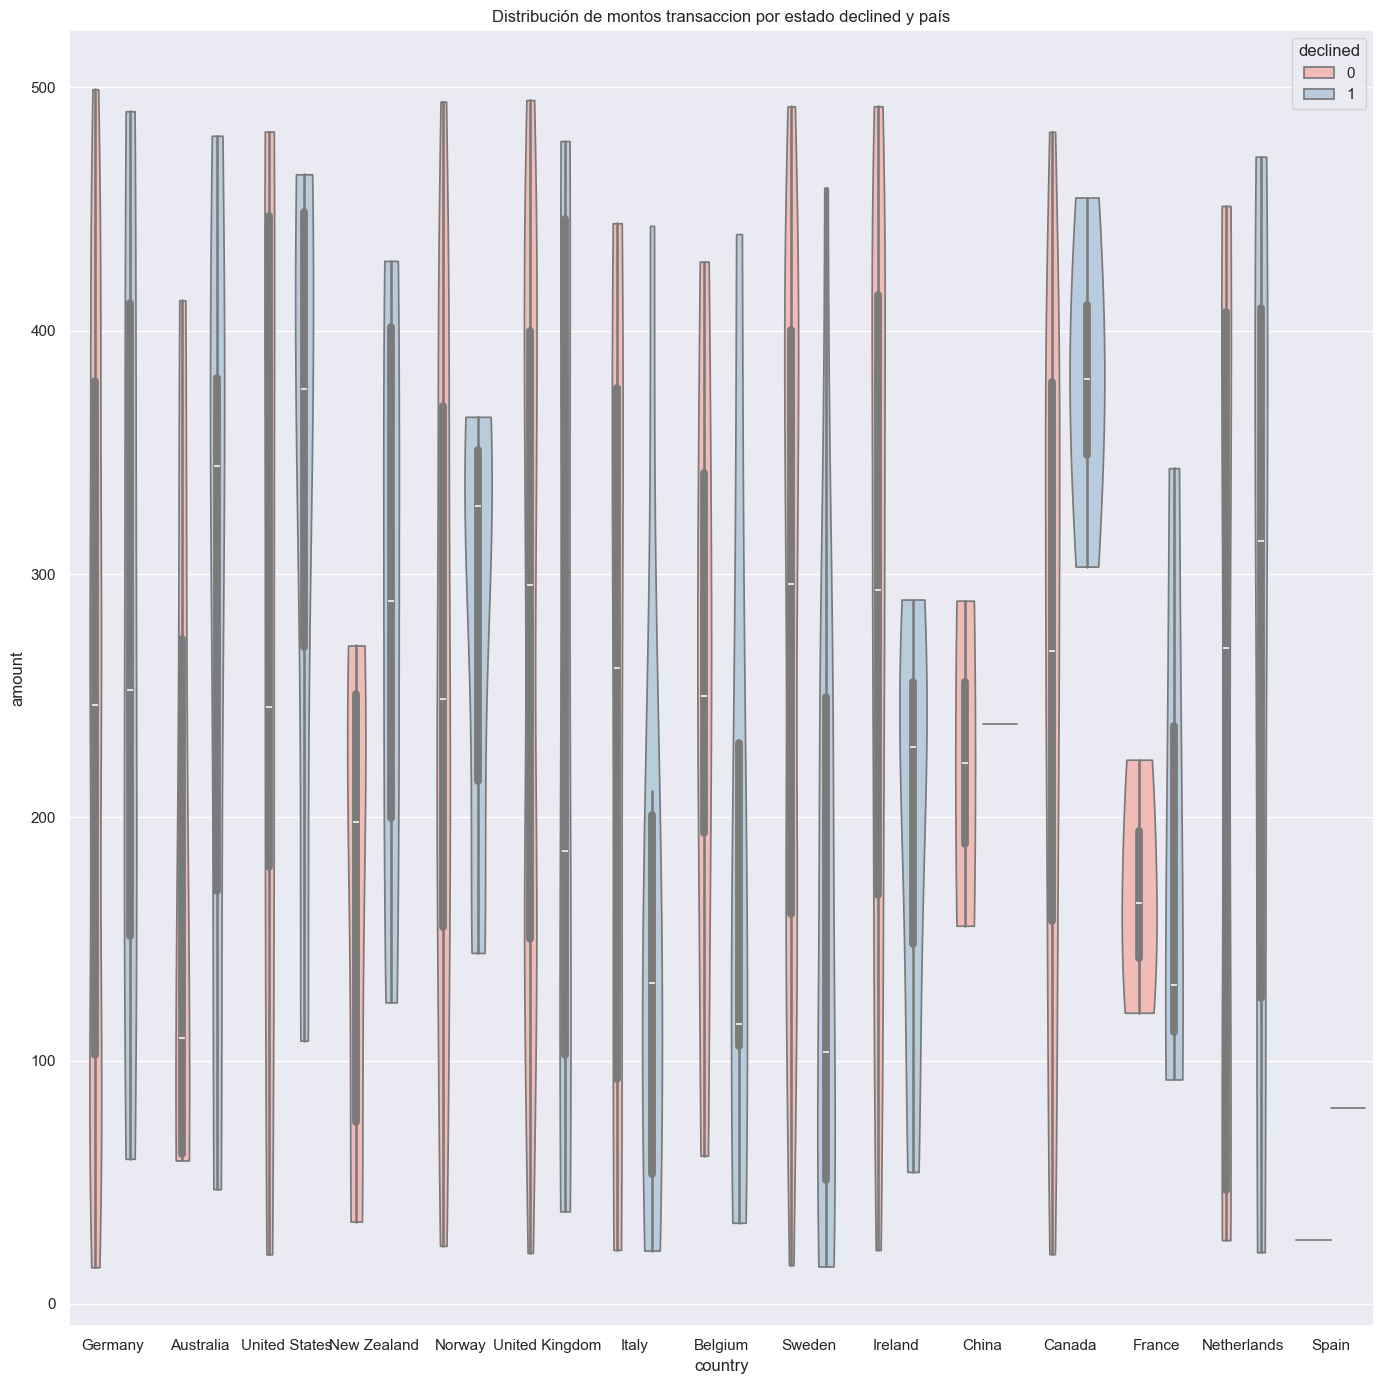

In [27]:
# DATAFRAME

conecction = conector_sql()
df_companies = pd.read_sql("SELECT * FROM companies", conecction)
df_transacciones = pd.read_sql("SELECT * FROM transacciones", conecction)

# MERGE DE TABLAS PARA VIOLINPLOT

df_ventas_violinplotbox = pd.merge(
    df_companies,
    df_transacciones,
    left_on='company_id',
    right_on='business_id', 
    how='inner'
)
# Mostrar DATAFRAME

mostrar_cinco_primeras(df_ventas_violinplotbox)

# CODIGO PARA GRAFICAR VIOLINPLOT

sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 14))
sns.violinplot(x="country", y="amount", hue="declined", data=df_ventas_violinplotbox, palette="Pastel1", cut=0)


plt.title("Distribución de montos transaccion por estado declined y país")

plt.tight_layout()
plt.show()


In [ ]:

# Se ha utilizado  violinplot para mostrar la distribución de la cantidad media de cada transacciones (amount) segmentados por país y por si la transacción fue rechazada o no.  
# JUSTIFICACION: -  combina la información de un boxplot con la densidad de la distribución, facilitando comparaciones entre categorías.  

# INTERPRETACION 
#   Se puede observar que en varios países como China o Canadá hay diferencias notables en las distribuciones de montos entre transacciones aprobadas y rechazadas.  
#   Algunos países presentan mucha variabilidad (como Australia y Germany), lo que podría indicar un rango amplio de montos en las transacciones.  
#   En otros países como Spain o Netherlands, los datos son escasos, lo que se refleja en la poca o nula densidad.

In [28]:
#Nivel 3: Exercise 2 Generate a FacetGrid to visualize multiple aspects of the data simultaneously. EDAD / GASTO MEDIO POR PAIS DE ORIGEN Y USUARIO



Conexión exitosa a la base de datos spr4


C:\Users\javie\AppData\Local\Temp\ipykernel_6908\2087792574.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_users = pd.read_sql("SELECT * FROM users", connection)
C:\Users\javie\AppData\Local\Temp\ipykernel_6908\2087792574.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)


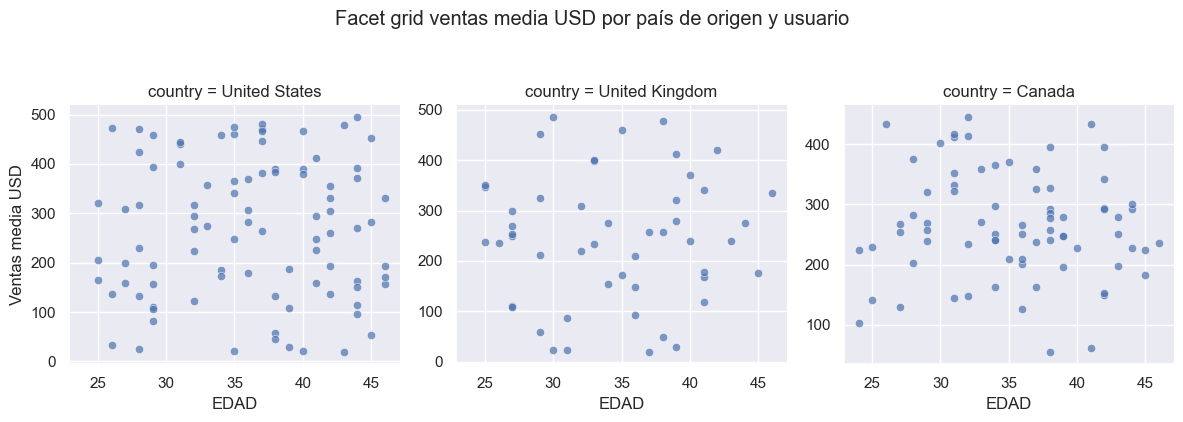

In [29]:
# DATAFRAME

connection = conector_sql()
df_users = pd.read_sql("SELECT * FROM users", connection)
df_transacciones = pd.read_sql("SELECT * FROM transacciones", connection)

# MERGE para obtener edad, país y transacciones
df_facetgrid = pd.merge(
    df_users,
    df_transacciones,
    left_on='id',
    right_on='user_id',
    how='inner'
)

#Calcular AGE desde birthdate

df_facetgrid['age'] = pd.to_datetime('today').year - pd.to_datetime(df_facetgrid['birth_date']).dt.year

# Calcular gasto medio por usuario y país con PANDAS 

df_facetgrid = df_facetgrid.groupby(['user_id', 'age', 'country']).agg(
    ventas_media_usd=('amount', 'mean'),
).reset_index()

# FacetGrid: Distribución de gasto medio por edad y país

sns.FacetGrid(df_facetgrid, col="country", col_wrap=3, height=4, sharey=False) \
   .map_dataframe(sns.scatterplot, x="age", y="ventas_media_usd", alpha=0.7) \
   .set_axis_labels("EDAD", "Ventas media USD") \
   .fig.suptitle("Facet grid ventas media USD por país de origen y usuario", y=1.05)

plt.tight_layout()
plt.show()


In [ ]:
# Elección del gráfico: En este caso se ha utilizado FacetGrid para visualizar múltiples subgráficas para cada país, mostrando la relación entre edad y gasto medio por usuario.  
# Interpretación:
#   No hay una tendencia clara entre edad y gasto medio por usuario, lo que sugiere que el gasto no depende directamente de la edad.
